In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Rename column names so that merging will work properly   
ratings = pd.read_csv("L:\eric_100k\ml-100k/u.data.csv", header=None, usecols=[0,1,2], names=[ 'userId', 'movieId', 'rating', 'timestamp'])
#Make sure to use encoding='latin-1' in movies otherwise the read_csv won't work
movies = pd.read_csv("L:\eric_100k\ml-100k/u.item.csv", header=None, encoding='latin-1', usecols=[0,1], names=['movieId', 'title'])

In [3]:
movies

,movieId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
ratings

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [5]:
merged_df = pd.merge(movies,ratings,how='outer')
merged_df

,movieId,title,userId,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1
99996,1679,B. Monkey (1998),863,3
99997,1680,Sliding Doors (1998),863,2
99998,1681,You So Crazy (1994),896,3


In [6]:
n_users, n_movies  = ratings['userId'].nunique(), ratings['movieId'].nunique()
n_users, n_movies

(943, 1682)

In [7]:
n_movies1=movies['movieId'].nunique()
n_movies1

1682

In [8]:
n_movies2=movies['title'].nunique()
n_movies2

1664

In [9]:
#You can use this method if you ever want to pivot your table
def pivot(data):
    pivoted_data = data.pivot_table(index = ["userId"],columns = ["movieId"],values = "rating")
    pivoted_data.fillna( 0, inplace = True )
    #pd.pivot_table(data, values='rating', index='userId', columns='title', fill_value=0)
    return pivoted_data

In [10]:
#Merge ratings with movies
#merged_df = pd.merge(ratings, movies, on='movieId')

In [11]:
#merged_df

In [12]:
#Pivot table to lookup ratings
pivoted_merge = pivot(merged_df)
#pivoted_merge = ratings.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)
pivoted_merge.fillna( 0, inplace = True )

In [13]:
pivoted_merge

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
movie_stats = merged_df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.sort_values([('rating', 'mean')], ascending=False).head(20)

rating          
                                                     size      mean
title                                                              
Santa with Muscles (1996)                               2  5.000000
Aiqing wansui (1994)                                    1  5.000000
Star Kid (1997)                                         3  5.000000
Someone Else's America (1995)                           1  5.000000
They Made Me a Criminal (1939)                          1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Prefontaine (1997)                                      3  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Pather Panchali (1955)                                  8  4.625000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Some Mother's Son (1996)                                2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

In [15]:
#find the stata that have at least 50 rates
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head(20)

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Third Man, The (1949)                                  72  4.333333
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542

In [16]:
unique, counts = np.unique(ratings.rating, return_counts=True)
dict(zip(unique, counts))

{1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201}

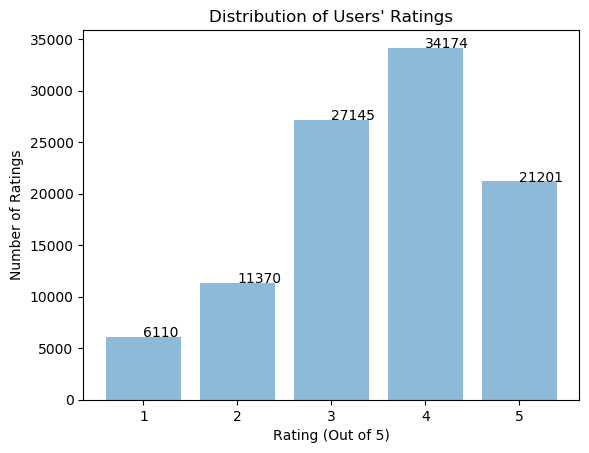

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = unique
y_pos = unique
performance =counts

plt.bar(objects, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');
plt.title("Distribution of Users' Ratings")

for i in range(len(counts)):
    plt.annotate(str(performance[i]), xy=(objects[i],performance[i]))

plt.show()

In [18]:
user = pd.read_csv("L:\eric_100k\ml-100k/u.user.csv", header=None, encoding='latin-1', usecols=[0,1,2,3,4], names=['user_id', 'age', 'sex', 'occupation', 'zip_code'])



In [19]:
user

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,2215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [20]:
unique, counts = np.unique(user.age, return_counts=True)
dict(zip(unique, counts))

{7: 1,
 10: 1,
 11: 1,
 13: 5,
 14: 3,
 15: 6,
 16: 5,
 17: 14,
 18: 18,
 19: 23,
 20: 32,
 21: 27,
 22: 37,
 23: 28,
 24: 33,
 25: 38,
 26: 34,
 27: 35,
 28: 36,
 29: 32,
 30: 39,
 31: 25,
 32: 28,
 33: 26,
 34: 17,
 35: 27,
 36: 21,
 37: 19,
 38: 17,
 39: 22,
 40: 21,
 41: 10,
 42: 21,
 43: 13,
 44: 23,
 45: 15,
 46: 12,
 47: 14,
 48: 20,
 49: 19,
 50: 20,
 51: 20,
 52: 6,
 53: 12,
 54: 4,
 55: 11,
 56: 6,
 57: 9,
 58: 3,
 59: 3,
 60: 9,
 61: 3,
 62: 2,
 63: 3,
 64: 2,
 65: 3,
 66: 1,
 68: 2,
 69: 2,
 70: 3,
 73: 1}

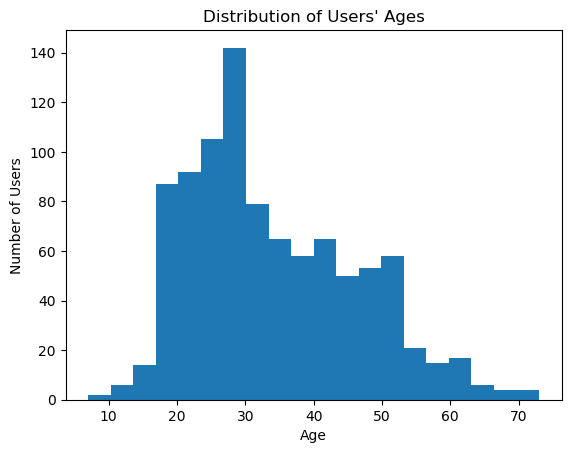

In [21]:
user.age.plot.hist(bins=20)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age');

In [22]:
#Movie_Recommendation1 by using Correlation Coefficient
#https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
"""
user_inp="Batman Forever (1995)"
inp=movies[movies['title']==user_inp].index.tolist()
inp=inp[0]
print(inp)
movie_watched = pivoted_merge [inp]



similarity_with_other_movies = pivoted_merge .corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head(10)
"""

'\nuser_inp="Batman Forever (1995)"\ninp=movies[movies[\'title\']==user_inp].index.tolist()\ninp=inp[0]\nprint(inp)\nmovie_watched = pivoted_merge [inp]\n\n\n\nsimilarity_with_other_movies = pivoted_merge .corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies\nsimilarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)\nsimilarity_with_other_movies.head(10)\n'

In [23]:
#Movie_Recommendation2 by using Cosine similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

user_corr = pairwise_distances(pivoted_merge , metric="correlation")

# ".T" below is to transpose our 2D matrix.
corr_train_data_matrix_transpose = pivoted_merge.T
movie_corr = pairwise_distances(corr_train_data_matrix_transpose, metric="correlation")

user_corr.shape, movie_corr.shape

((943, 943), (1682, 1682))

In [24]:
user_corr = pd.DataFrame(user_corr)
user_corr

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.893678,1.016424,0.978284,0.697408,0.654024,0.679983,0.723792,0.961188,0.711509,...,0.714077,0.931122,0.810728,0.853021,0.880556,0.939825,0.752517,0.884496,0.891016,0.676769
1,0.893678,0.000000,0.917320,0.839677,0.979782,0.802156,0.977114,0.927228,0.856284,0.893139,...,0.893584,0.711450,0.674767,0.591534,0.710888,0.795906,0.809152,0.855823,0.861708,0.945765
2,1.016424,0.917320,0.000000,0.668326,1.028322,0.982327,1.013384,0.944615,0.956495,0.987920,...,1.020605,0.981254,0.875826,0.953753,0.911026,1.001145,0.872461,0.915468,0.897975,1.023601
3,0.978284,0.839677,0.668326,0.000000,1.002426,0.969794,0.958944,0.828884,0.910628,0.975982,...,0.983359,0.980262,0.894865,0.820402,0.877351,0.989110,0.825096,0.859189,0.850425,0.974633
4,0.697408,0.979782,1.028322,1.002426,0.000000,0.846591,0.720323,0.790720,0.974504,0.882834,...,0.727134,0.960667,0.986001,0.960481,0.914452,0.975708,0.817534,0.887429,0.903397,0.751009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.939825,0.795906,1.001145,0.989110,0.975708,0.940513,0.967409,0.931730,0.978331,0.981843,...,0.984815,0.583221,0.776827,0.792682,0.589530,0.000000,0.950483,0.835261,0.991964,0.899251
939,0.752517,0.809152,0.872461,0.825096,0.817534,0.704051,0.748012,0.786592,0.903114,0.712417,...,0.726922,0.925995,0.871776,0.847778,0.875059,0.950483,0.000000,0.877522,0.778766,0.817387
940,0.884496,0.855823,0.915468,0.859189,0.887429,0.886142,0.991832,0.870904,0.867600,0.942818,...,0.987113,0.810034,0.730630,0.778304,0.702812,0.835261,0.877522,0.000000,0.919870,0.934700
941,0.891016,0.861708,0.897975,0.850425,0.903397,0.733655,0.789610,0.857168,0.929305,0.845705,...,0.827632,0.956761,0.968500,0.898052,0.948568,0.991964,0.778766,0.919870,0.000000,0.872265


In [26]:
movie_corr = pd.DataFrame(movie_corr)
movie_corr= 1- movie_corr

In [32]:
import copy
def top_k_movies_corr(movie_name,k=10):
    k=k+1
    temp=[]
    temp_movies = copy.deepcopy(movies) 
    user_inp = movie_name
    inp=temp_movies[temp_movies['title']==user_inp].index.tolist()
    inp=inp[0]
    print (inp)
    temp_movies['correlation'] = movie_corr.iloc[inp]
    temp_movies.columns = ['movie_id', 'title','correlation']
    top_k=temp_movies.sort_values(['correlation'], ascending=False).head(k)
    #top_k=temp_movies.sort_values(['correlation'], ascending=False).tail(k)
    #top_k=top_k[::-1]
    top_k=top_k[1:k]
    return top_k

In [33]:
checkpoint2=top_k_movies_corr('Batman Forever (1995)',k=10)
print(checkpoint2)

28
     movie_id                              title  correlation
402       403                      Batman (1989)     0.604354
230       231              Batman Returns (1992)     0.597274
575       576                 Cliffhanger (1993)     0.552167
577       578              Demolition Man (1993)     0.551211
61         62                    Stargate (1994)     0.539629
37         38                    Net, The (1995)     0.536746
553       554                  Waterworld (1995)     0.536615
1           2                   GoldenEye (1995)     0.526570
549       550  Die Hard: With a Vengeance (1995)     0.516208
372       373                 Judge Dredd (1995)     0.507355


In [29]:
movie_corr

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.018215,-0.029676,-0.029676,-0.029676,0.018215,-0.029676,-0.029676,-0.029676,0.034179,0.034179
1,0.234595,1.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,0.071415,0.071415
2,0.193362,0.190649,1.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,-0.009764,-0.009764,-0.009764,-0.009764,0.023964,-0.009764,-0.009764,-0.009764,-0.009764,0.091421
3,0.226213,0.409044,0.227849,1.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,-0.016619,-0.016619,0.088984,0.088984,0.025622,-0.016619,-0.016619,-0.016619,0.046743,0.067863
4,0.128840,0.240712,0.141368,0.237298,1.000000,-0.008594,0.205289,0.145866,0.142541,-0.033746,...,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,0.088618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,1.000000,-0.001062,-0.001062
1678,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,1.000000,-0.001062,-0.001062
1679,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,1.000000,-0.001062,-0.001062
1680,0.034179,0.071415,-0.009764,0.046743,-0.009889,-0.005159,0.039920,0.075617,0.047273,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,-0.001062


In [ ]:
#------------------------------------------------------------------------

In [23]:
#Movie_Recommendation2 by using Cosine similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

user_distances = pairwise_distances(pivoted_merge , metric="cosine")

# ".T" below is to transpose our 2D matrix.
train_data_matrix_transpose = pivoted_merge.T
movie_distances = pairwise_distances(train_data_matrix_transpose, metric="cosine")

user_distances.shape, movie_distances.shape

((943, 943), (1682, 1682))

In [24]:
user_distances

array([[1.33226763e-15, 8.33069016e-01, 9.52540457e-01, ...,
        8.51383057e-01, 8.20492117e-01, 6.01825261e-01],
       [8.33069016e-01, 1.11022302e-16, 8.89408675e-01, ...,
        8.38515222e-01, 8.27732187e-01, 8.94202122e-01],
       [9.52540457e-01, 8.89408675e-01, 0.00000000e+00, ...,
        8.98757435e-01, 8.66583851e-01, 9.73444131e-01],
       ...,
       [8.51383057e-01, 8.38515222e-01, 8.98757435e-01, ...,
        1.11022302e-16, 8.98358201e-01, 9.04880419e-01],
       [8.20492117e-01, 8.27732187e-01, 8.66583851e-01, ...,
        8.98358201e-01, 0.00000000e+00, 8.17535338e-01],
       [6.01825261e-01, 8.94202122e-01, 9.73444131e-01, ...,
        9.04880419e-01, 8.17535338e-01, 0.00000000e+00]])

In [25]:
movie_distances

array([[0.00000000e+00, 5.97617822e-01, 6.69755213e-01, ...,
        1.00000000e+00, 9.52816933e-01, 9.52816933e-01],
       [5.97617822e-01, 1.11022302e-16, 7.26930825e-01, ...,
        1.00000000e+00, 9.21700637e-01, 9.21700637e-01],
       [6.69755213e-01, 7.26930825e-01, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 9.03124947e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.52816933e-01, 9.21700637e-01, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.52816933e-01, 9.21700637e-01, 9.03124947e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [26]:
#similarity= 1-distance
user_similarity = 1 - user_distances
movie_similarity = 1 - movie_distances

In [27]:
user_similarity
uers_sim_matrix = pd.DataFrame(user_similarity)

In [28]:
uers_sim_matrix 

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.118095,0.228583,0.026271,0.030138,0.071459,0.111852,0.107027,0.095898,0.039852,0.071460,...,0.066039,0.431154,0.258021,0.226449,0.432666,1.000000,0.087687,0.180029,0.043264,0.144250
939,0.314072,0.226790,0.161890,0.196858,0.239955,0.352449,0.329925,0.246883,0.120495,0.342961,...,0.327153,0.107024,0.187536,0.181317,0.175158,0.087687,1.000000,0.145152,0.261376,0.241028
940,0.148617,0.161485,0.101243,0.152041,0.139595,0.144446,0.059993,0.146145,0.143245,0.090305,...,0.046952,0.203301,0.288318,0.234211,0.313400,0.180029,0.145152,1.000000,0.101642,0.095120
941,0.179508,0.172268,0.133416,0.170086,0.152497,0.317328,0.282003,0.175322,0.092497,0.212330,...,0.226440,0.073513,0.089588,0.129554,0.099385,0.043264,0.261376,0.101642,1.000000,0.182465


In [29]:
movie_similarity
movie_sim_matrix = pd.DataFrame(movie_similarity)

In [30]:
movie_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,1.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,1.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,1.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,1.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1680,0.047183,0.078299,0.000000,0.056413,0.000000,0.000000,0.051498,0.082033,0.057360,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000


In [32]:
import copy
def top_k_movies(movie_name,k=10):
    k=k+1
    temp=[]
    temp_movies = copy.deepcopy(movies) 
    user_inp = movie_name
    inp=temp_movies[temp_movies['title']==user_inp].index.tolist()
    inp=inp[0]
    print (inp)
    temp_movies['similarity'] = movie_sim_matrix.iloc[inp]
    temp_movies.columns = ['movie_id', 'title','similarity']
    #temp_movies.sort_values(['similarity'], ascending=False)
    top_k=temp_movies.sort_values(['similarity'], ascending=False).head(k)
    top_k=top_k[1:k]
    return top_k

In [33]:
checkpoint=top_k_movies('Batman Forever (1995)')
print(checkpoint)

28
     movie_id                              title  similarity
402       403                      Batman (1989)    0.656368
230       231              Batman Returns (1992)    0.644381
575       576                 Cliffhanger (1993)    0.595219
577       578              Demolition Man (1993)    0.594176
61         62                    Stargate (1994)    0.591657
37         38                    Net, The (1995)    0.587535
553       554                  Waterworld (1995)    0.582711
1           2                   GoldenEye (1995)    0.581119
549       550  Die Hard: With a Vengeance (1995)    0.575280
160       161                     Top Gun (1986)    0.564273


In [34]:
movies

,movieId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
